In [1]:
# access relevant libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
# defining dictionary to convert state abbreviations to state names
state_dict = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio', 
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming'
}

In [3]:
df_laws = pd.read_csv('gun_laws.csv')

In [4]:
df_laws

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Wyoming,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1496,Wyoming,2017,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1497,Wyoming,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1498,Wyoming,2019,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [5]:
# importing and cleaning shootings dataframe
df_shootings = pd.read_csv('Violence Project Mass Shooter Database.csv')
df_shootings.columns = df_shootings.iloc[0]
df_shootings = df_shootings.iloc[1:]

# dropping shootings in DC since there's no law data in the dataset
df_shootings = df_shootings[df_shootings['State'] != 'DC'].reset_index()

# converting state abbreviations to state names
for idx in range(len(df_shootings)):
    df_shootings.loc[idx, 'State'] = state_dict[df_shootings.loc[idx, 'State']]
    
# converting years to ints
df_shootings['Year'] = df_shootings['Year'].astype('int')

# only keeping data from between 1991 and 2019 to match timeframe of laws dataset
df_shootings = df_shootings[(df_shootings['Year'] >= 1991) & (df_shootings['Year'] <= 2019)].reset_index()

df_shootings

,level_0,index,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
0,39,40,40,Harris,Joseph,10/10/1991,Thursday,10,10,1991,...,1,3,2,1,"bulletproof vest, gas mask, samurai sword, han...",2,0,0,1,1
1,40,41,41,Hennard,George,10/16/1991,Wednesday,16,10,1991,...,0,3,2,0,NaN,0,1,0,2,0
2,41,42,42,Lu,Gang,11/1/1991,Friday,1,11,1991,...,1,1,2,0,NaN,0,1,0,2,0
3,42,43,43,Daigneau,Robert,11/9/1991,Saturday,9,11,1991,...,0,3,1,0,NaN,0,1,0,2,0
4,43,44,44,McIlvane,Thomas,11/14/1991,Thursday,14,11,1991,...,0,3,1,0,NaN,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,166,168,169,Crusius,Patrick,8/3/2019,Saturday,3,8,2019,...,0,1,1,1,ear protection,2,0,0,3,NaN
128,167,169,170,Betts,Connor,8/4/2019,Sunday,4,8,2019,...,0,1,2,1,"mask, body armor",1,2,0,2,0
129,168,170,171,Ator,Seth,8/31/2019,Saturday,31,8,2019,...,0,1,1,0,NaN,1,2,0,2,0
130,169,171,172,Anderson,David,12/10/2019,Tuesday,10,12,2019,...,0,3,5,1,"Pipe bomb, homemade silencer, homemade device ...",1,2,0,2,0


In [6]:
# adding up number of deaths for each state over each year
df_shootings = df_shootings[['State', 'Year', 'Number Killed']]
df_shootings = df_shootings.astype({'Number Killed' : 'int32'})
df_deaths = df_shootings.groupby(by=['State', 'Year']).sum()

deaths = list()

# adding this information to laws dataframe
for idx in range(len(df_laws)):
    state, year = df_laws.loc[idx, 'state'], df_laws.loc[idx, 'year']
    
    if df_deaths.index.isin([(state, year)]).any():
        deaths.append(df_deaths.loc[(state, year), :])
    else:
        deaths.append(0)

df_laws['deaths'] = deaths
df_laws = df_laws.astype({'deaths' : 'int'})
df_laws

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal,deaths
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,15,0
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,16,0
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,16,0
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,16,0
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Wyoming,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
1496,Wyoming,2017,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
1497,Wyoming,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
1498,Wyoming,2019,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0


In [7]:
df_laws.describe()

,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,...,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal,deaths
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2005.500000,0.686000,0.468667,0.221333,0.420000,0.186667,0.099333,0.138667,0.071333,0.053333,...,0.207333,0.180667,0.142667,0.107333,0.089333,0.078667,0.030667,0.288667,23.966667,0.652667
std,8.658328,0.464271,0.499184,0.415283,0.493723,0.389774,0.299209,0.345714,0.257467,0.224772,...,0.405532,0.384870,0.349849,0.309640,0.285319,0.269308,0.172470,0.453294,22.555725,3.247418
min,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
50%,2005.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
75%,2013.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000
max,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,60.000000


In [8]:
strict_status = list()

# adding this information to laws dataframe
for idx in range(len(df_laws)):
    
    if df_laws.iloc[idx]['lawtotal'] >= 25:
        strict_status.append('strict')
    
    elif df_laws.iloc[idx]['lawtotal'] <= 10:
        strict_status.append('relaxed')
        
    else:
        strict_status.append('average')
df_laws['strict status'] = strict_status
    

/var/folders/6p/y4fftvz555x764wmpxsdztgh0000gn/T/ipykernel_90909/3593302788.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_laws['strict status'] = strict_status


In [9]:
df_laws['strict status'] = df_laws['strict status'].replace(['relaxed'],0)

df_laws['strict status'] = df_laws['strict status'].replace(['average'],1)

df_laws['strict status'] = df_laws['strict status'].replace(['strict'],2)

df_laws

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal,deaths,strict status
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,15,0,1
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,16,0,1
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,16,0,1
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,16,0,1
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Wyoming,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0
1496,Wyoming,2017,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0
1497,Wyoming,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
1498,Wyoming,2019,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0


In [10]:
x = np.array(df_laws.iloc[:, -2]).reshape(-1, 1)
y = df_laws.iloc[:, -1]
# fitting random forest regressor to train data
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, stratify = y)

In [11]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, # the features
                                                    y, # the labels
                                                    test_size = 0.3, # using 30% of data as test set
                                                    random_state = 7, # make result reproducible
                                                   ) 

[Text(0.5, 1.0, 'KNN Model'),
 Text(0.5, 0, 'N Neighbors'),
 Text(0, 0.5, 'Accuracy')]

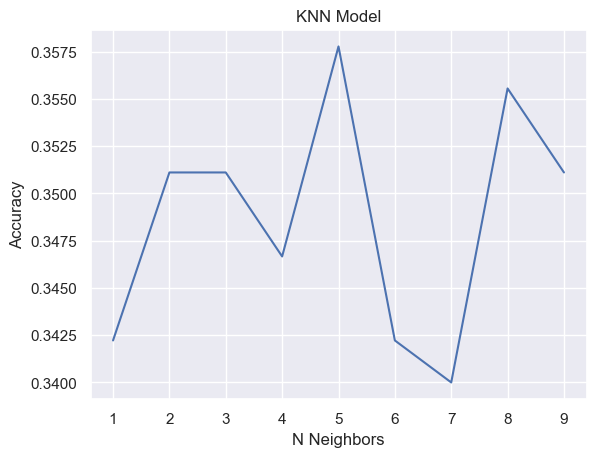

In [12]:
#build the k-nn model, experiment with different values of k and plot the results
predictions = {}

# test numbers between 3 and 50 as the k-value
for k in range(1, 10, 1): #increment k by 1
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)
    
# show line plot
sns.lineplot(x=predictions.keys(), y=predictions.values()).set(title='KNN Model', xlabel='N Neighbors', ylabel='Accuracy')

In [13]:
# test 5 as the k-value
knn = KNeighborsClassifier(n_neighbors = 5) #initialize the classifier and set the number of neighbors
knn.fit(X_train, y_train)

# predict the accuracy when k-value is 3
print('The accuracy of the model is: {}'.format("{:.2f}".format(knn.score(X_test, y_test))))

The accuracy of the model is: 0.36


In [14]:
#get the classification report for when k value is 5
knn = KNeighborsClassifier(n_neighbors = 5) #initialize the classifier and set n_neighbors as 5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

target_names = ['relaxed','average','strict']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     relaxed       0.34      0.98      0.50       145
     average       0.50      0.05      0.09       184
      strict       0.71      0.08      0.15       121

    accuracy                           0.36       450
   macro avg       0.52      0.37      0.25       450
weighted avg       0.51      0.36      0.24       450

